<a href="https://colab.research.google.com/github/Kanyinsola-Odunaiya/schulich_data_science/blob/main/Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

In [49]:
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving olist_customers_dataset.csv to olist_customers_dataset.csv
Saving olist_geolocation_dataset.csv to olist_geolocation_dataset.csv
Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv
Saving olist_products_dataset.csv to olist_products_dataset.csv
Saving olist_sellers_dataset.csv to olist_sellers_dataset.csv
Saving product_category_name_translation.csv to product_category_name_translation.csv


In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')

In [4]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [6]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [8]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [9]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [11]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [12]:
product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [13]:
#Including the english translation of each product category
products = pd.merge(products, product_category, on='product_category_name', how='left')

In [14]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [15]:
df = orders.merge(customers, on="customer_id", how="left")

In [16]:
 df = df.merge(payments, on="order_id", how="left")

In [17]:
df= df.merge(reviews, on="order_id", how="left")

In [18]:
df= df.merge(items, on="order_id", how="left")

In [19]:
df= df.merge(products, on="product_id", how="left")

In [20]:
df= df.merge(sellers, on="seller_id", how="left")

In [24]:
#Averaging the longitude and latitude toavoid over expansion of the data
geo_avg = geolocation.groupby("geolocation_zip_code_prefix")[["geolocation_lat", "geolocation_lng"]].mean().reset_index()

In [25]:
print(df.columns.tolist())

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


In [26]:
#Aggregating longitude an latitide by mean and selecting the mode for both city and state
geo_meta = (
    geolocation.groupby("geolocation_zip_code_prefix")
    .agg({
        "geolocation_city": lambda x: x.mode().iloc[0],
        "geolocation_state": lambda x: x.mode().iloc[0],
        "geolocation_lat": "mean",
        "geolocation_lng": "mean"
    })
    .reset_index()
)

In [27]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [28]:
geo_meta

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1001,sao paulo,SP,-23.550190,-46.634024
1,1002,sao paulo,SP,-23.548146,-46.634979
2,1003,sao paulo,SP,-23.548994,-46.635731
3,1004,sao paulo,SP,-23.549799,-46.634757
4,1005,sao paulo,SP,-23.549456,-46.636733
...,...,...,...,...,...
19010,99960,charrua,RS,-27.953722,-52.025511
19011,99965,agua santa,RS,-28.183372,-52.039850
19012,99970,ciriaco,RS,-28.343766,-51.874689
19013,99980,david canabarro,RS,-28.389129,-51.843836


In [29]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,828.0,4.0,4950.0,40.0,10.0,40.0,baby,17602.0,tupa,SP
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2,8290.0,sao paulo,SP
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,37175.0,ilicinea,MG
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,37175.0,ilicinea,MG


In [30]:
# Prepare geo_meta for customer merge
geo_customer = geo_meta.rename(columns={
    "geolocation_zip_code_prefix": "customer_zip_code_prefix",
    "geolocation_city": "customer_geo_city",
    "geolocation_state": "customer_geo_state",
    "geolocation_lat": "customer_lat",
    "geolocation_lng": "customer_lng"
})

# Merge
olist_df = df.merge(
    geo_customer,
    on="customer_zip_code_prefix",
    how="left"
)


In [31]:
# Prepare geo_meta for seller merge
geo_seller = geo_meta.rename(columns={
    "geolocation_zip_code_prefix": "seller_zip_code_prefix",
    "geolocation_city": "seller_geo_city",
    "geolocation_state": "seller_geo_state",
    "geolocation_lat": "seller_lat",
    "geolocation_lng": "seller_lng"
})

# Merge
olist_df = olist_df.merge(
    geo_seller,
    on="seller_zip_code_prefix",
    how="left"
)


In [32]:
olist_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,customer_geo_city,customer_geo_state,customer_lat,customer_lng,seller_geo_city,seller_geo_state,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,sao paulo,SP,-23.576983,-46.587161,maua,SP,-23.680729,-46.444238
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,sao paulo,SP,-23.576983,-46.587161,maua,SP,-23.680729,-46.444238
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,sao paulo,SP,-23.576983,-46.587161,maua,SP,-23.680729,-46.444238
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,belo horizonte,SP,barreiras,BA,-12.177924,-44.660711,belo horizonte,MG,-19.807681,-43.980427
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,guariba,SP,vianopolis,GO,-16.745150,-48.514783,guariba,SP,-21.363502,-48.229601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,tupa,SP,praia grande,SP,-24.001500,-46.449864,tupa,SP,-21.930548,-50.498348
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,sao paulo,SP,nova vicosa,BA,-17.898358,-39.373630,sao paulo,SP,-23.553642,-46.452661
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,ilicinea,MG,japuiba,RJ,-22.562825,-42.694574,ilicinea,MG,-20.940578,-45.827237
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,ilicinea,MG,japuiba,RJ,-22.562825,-42.694574,ilicinea,MG,-20.940578,-45.827237


In [33]:
olist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  payment_sequential            

In [34]:
#columns to be converted to datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

# Convert multiple columns to datetime
olist_df[date_columns] = olist_df[date_columns].apply(pd.to_datetime, errors='coerce')

In [35]:
olist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   customer_unique_id             119143 non-null  object        
 9   customer_zip_code_prefix       119143 non-null  int64         
 10  customer_city                  119143 non-null  object        
 11  

In [36]:
olist_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_lat,customer_lng,seller_lat,seller_lng
count,119143,118966,117057,115722,119143,119143.000000,119140.000000,119140.000000,119140.000000,118146.000000,...,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118821.000000,118821.000000,118045.000000,118045.000000
mean,2017-12-29 18:36:13.115760128,2017-12-30 04:49:18.425726976,2018-01-03 08:24:34.395524864,2018-01-12 20:55:38.199616,2018-01-22 15:21:10.241642240,35033.451298,1.094737,2.941246,172.735135,4.015582,...,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,-21.230187,-46.191214,-22.795042,-47.238176
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1003.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,-33.689948,-72.668881,-32.079231,-67.813284
25%,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,11250.000000,1.000000,1.000000,60.850000,4.000000,...,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,-23.589488,-48.097776,-23.606344,-48.829744
50%,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,24240.000000,1.000000,2.000000,108.160000,5.000000,...,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,-22.928413,-46.631239,-23.425556,-46.750602
75%,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,58475.000000,1.000000,4.000000,189.240000,5.000000,...,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,-20.180863,-43.608100,-21.757321,-46.518679
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,99990.000000,29.000000,24.000000,13664.080000,5.000000,...,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,42.184003,-8.723762,-2.501242,-34.855616
std,NaN,NaN,NaN,NaN,NaN,29823.198969,0.730141,2.777848,267.776077,1.400436,...,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,5.564179,4.042785,2.690838,2.339804


In [37]:
olist_df['price'].describe()

,price
count,118310.000000
mean,120.646603
std,184.109691
min,0.850000
25%,39.900000
50%,74.900000
75%,134.900000
max,6735.000000


In [38]:
olist_df['payment_value'].describe()

,payment_value
count,119140.000000
mean,172.735135
std,267.776077
min,0.000000
25%,60.850000
50%,108.160000
75%,189.240000
max,13664.080000


In [39]:
olist_df[olist_df['price']==6735]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,customer_geo_city,customer_geo_state,customer_lat,customer_lng,seller_geo_city,seller_geo_state,seller_lat,seller_lng
26500,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,dc4802a71eae9be1dd28f5d788ceb526,79042,...,sao paulo,SP,campo grande,MS,-20.48461,-54.570572,sao paulo,SP,-23.51731,-46.519781


<Axes: xlabel='price', ylabel='Count'>

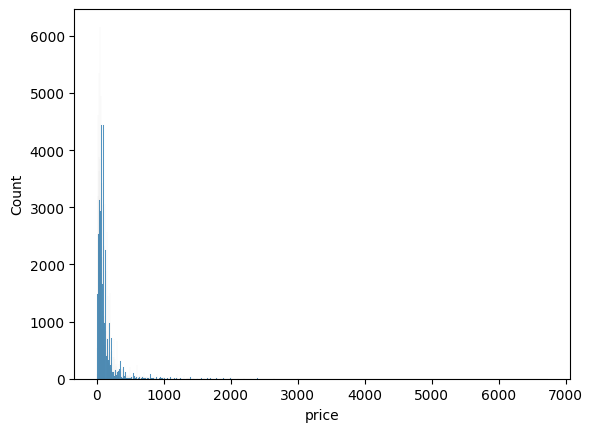

In [40]:
sns.histplot(olist_df['price'])

In [42]:
# Select relevant columns to assess price context
cols_to_check = [
    'order_id', 'product_id', 'product_category_name', 'product_category_name_english',
    'price', 'freight_value', 'payment_value',
    'product_description_lenght', 'product_photos_qty',
    'order_item_id'
]

# Sort by price to see the most expensive first
price_check_df = olist_df[cols_to_check].sort_values(by='price', ascending=False)

# View top 10 expensive items
price_check_df.head(20)


,order_id,product_id,product_category_name,product_category_name_english,price,freight_value,payment_value,product_description_lenght,product_photos_qty,order_item_id
26500,0812eb902a67711a1cb742b3cdaa65ae,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,housewares,6735.00,194.31,6929.31,875.0,2.0,1.0
33966,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,computers,6729.00,193.21,6922.21,1935.0,4.0,1.0
4161,f5136e38d1a14a4dbd87dff67da82701,1bdf5e6731585cf01aa8169c7028d6ad,artes,art,6499.00,227.66,6726.66,3954.0,2.0,1.0
63850,a96610ab360d42a2e5335a3998b4718a,a6492cc69376c469ab6f61d8f44de961,eletroportateis,small_appliances,4799.00,151.34,4950.34,1780.0,2.0,1.0
48345,199af31afc78c699f0dbf71fb178d4d4,c3ed642d592594bb648ff4a04cee2747,eletroportateis,small_appliances,4690.00,74.34,4764.34,2217.0,2.0,1.0
48361,8dbc85d1447242f3b127dda390d56e19,259037a6a41845e455183f89c5035f18,pcs,computers,4590.00,91.78,4681.78,1710.0,2.0,1.0
13890,426a9742b533fc6fed17d1fd6d143d7e,a1beef8f3992dbd4cd8726796aa69c53,instrumentos_musicais,musical_instruments,4399.87,113.45,4513.32,944.0,3.0,1.0
23265,68101694e5c5dc7330c91e1bbc36214f,6cdf8fc1d741c76586d8b6b15e9eef30,consoles_games,consoles_games,4099.99,75.27,4175.26,3172.0,1.0,1.0
3196,b239ca7cd485940b31882363b52e6674,dd113cb02b2af9c8e5787e8f1f0722f6,esporte_lazer,sports_leisure,4059.00,104.51,4163.51,1511.0,1.0,1.0
68256,86c4eab1571921a6a6e248ed312f5a5a,6902c1962dd19d540807d0ab8fade5c6,relogios_presentes,watches_gifts,3999.90,17.01,4016.91,1773.0,2.0,1.0


In [43]:
# Select relevant columns to assess price context
cols_to_check = [
    'order_id', 'product_id', 'product_category_name', 'product_category_name_english',
    'price', 'freight_value', 'payment_value',
    'product_description_lenght', 'product_photos_qty',
    'order_item_id'
]

# Sort by price to see the most expensive first
price_check_df = olist_df[cols_to_check].sort_values(by='price', ascending=True)

# View top 10 expensive items
price_check_df.head(50)

,order_id,product_id,product_category_name,product_category_name_english,price,freight_value,payment_value,product_description_lenght,product_photos_qty,order_item_id
62983,c5bdd8ef3c0ec420232e668302179113,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,construction_tools_construction,0.85,22.30,54.20,1041.0,5.0,2.0
84995,3ee6513ae7ea23bdfab5b9ab60bffcb5,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,construction_tools_construction,0.85,18.23,19.08,1041.0,5.0,1.0
99636,6e864b3f0ec71031117ad4cf46b7f2a1,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,construction_tools_construction,0.85,18.23,19.08,1041.0,5.0,1.0
106304,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,beleza_saude,health_beauty,1.20,7.89,196.11,232.0,3.0,20.0
106296,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,beleza_saude,health_beauty,1.20,7.89,196.11,232.0,3.0,12.0
106289,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,beleza_saude,health_beauty,1.20,7.89,196.11,231.0,3.0,5.0
106298,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,beleza_saude,health_beauty,1.20,7.89,196.11,232.0,3.0,14.0
106302,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,beleza_saude,health_beauty,1.20,7.89,196.11,232.0,3.0,18.0
106301,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,beleza_saude,health_beauty,1.20,7.89,196.11,232.0,3.0,17.0
106299,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,beleza_saude,health_beauty,1.20,7.89,196.11,232.0,3.0,15.0


In [44]:
#check what makes us payment value
#The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same product). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.
#The total order_item value is: 21.33 * 3 = 63.99
#The total freight value is: 15.10 * 3 = 45.30
#The total order value (product + freight) is: 45.30 + 63.99 = 109.29

In [45]:
# Group by 'customer_unique_id' and count the number of unique customers
unique_customers_count = olist_df['customer_unique_id'].nunique()

print(f"The number of unique customers is: {unique_customers_count}")

The number of unique customers is: 96096


In [115]:
#ANALYSIS

In [116]:
#PRODUCT CHANGE
#The product team at Olist is testing a new seller ranking algorithm that prioritizes sellers with faster delivery times and
#higher customer satisfaction ratings. This change is designed to enhance user satisfaction and drive higher conversion rates thereby inreasing revenue.

In [69]:
#Target Audience: Customers who have made a purchase in the last one month

#To filter out canceled orders
valid_orders_df = olist_df[olist_df['order_status'] != 'canceled']

#To get the latest date in the dataset
latest_date = valid_orders_df['order_purchase_timestamp'].max()

#To filter for orders within the last 30 days
one_month_ago = latest_date - pd.Timedelta(days=30)
recent_purchases_df = valid_orders_df[valid_orders_df['order_purchase_timestamp'] >= one_month_ago]


In [70]:
recent_purchases_df['order_status'].value_counts()

,count
order_status,
delivered,6285
shipped,44
invoiced,17
unavailable,4


In [71]:
#SPLIT BETWEEN TEST AND CONTROL

#To get distinct customers
unique_customers = recent_purchases_df['customer_id'].drop_duplicates().to_frame()

# Randomly assign each customer to 'control' or 'treatment'
unique_customers['group'] = np.random.choice(
    ['control', 'treatment'],
    size=len(unique_customers),
    p=[0.3, 0.7]
)


In [72]:
#Merging the group assignment to the full dataset
recent_purchases_df = recent_purchases_df.merge(unique_customers, on='customer_id', how='left')


In [73]:
recent_purchases_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_state,customer_geo_city,customer_geo_state,customer_lat,customer_lng,seller_geo_city,seller_geo_state,seller_lat,seller_lng,group
0,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,SP,vianopolis,GO,-16.745150,-48.514783,guariba,SP,-21.363502,-48.229601,treatment
1,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,9c9242ad7f1b52d926ea76778e1c0c57,18052,...,SP,sorocaba,SP,-23.531732,-47.499804,tabatinga,SP,-21.737063,-48.687601,treatment
2,d22e9fa5731b9e30e8b27afcdc2f8563,756fb9391752dad934e0fe3733378e57,delivered,2018-08-04 23:25:30,2018-08-04 23:35:13,2018-08-06 15:03:00,2018-08-13 23:34:42,2018-09-13,394b2ce444baae9ae609f5d32000de0f,47850,...,SP,luis eduardo magalhaes,BA,-12.092513,-45.806927,rio claro,SP,-22.425778,-47.560437,treatment
3,f346ad4ee8f630e5e4ddaf862a34e6dd,dd5095632e3953fc0947b8ab5176b0be,delivered,2018-08-05 13:09:48,2018-08-05 13:24:34,2018-08-06 13:41:00,2018-08-10 18:35:40,2018-08-15,da45a9a1df408c39f013b9b0b505042c,70680,...,GO,brasilia,DF,-15.784432,-47.917046,goiania,GO,-16.665166,-49.301681,treatment
4,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30,a71cac9f356cfeb9db35061020806212,2407,...,SP,sao paulo,SP,-23.484875,-46.624575,sao paulo,SP,-23.652366,-46.755753,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03,7a22d14aa3c3599238509ddca4b93b01,5863,...,SP,sao paulo,SP,-23.676918,-46.766186,sao paulo,SP,-23.502723,-46.738728,treatment
6346,da95823b29f9ce7bcc4deebe1e568aff,47610d89c6fdfac969beb4fa9f5d37f1,delivered,2018-08-19 11:48:49,2018-08-20 11:31:32,2018-08-21 15:14:00,2018-08-22 14:49:01,2018-08-29,2ed0ea186de34fab740cdb294d78701e,9320,...,SP,maua,SP,-23.660031,-46.441511,limeira,SP,-22.555991,-47.422060,control
6347,079c9f53e6c3253320db701a645b0b9a,e5e0698e95094be297436cbd55c2dcad,delivered,2018-08-09 20:33:45,2018-08-09 20:50:17,2018-08-13 14:20:00,2018-08-16 17:51:09,2018-08-17,531d6ca1ecce995a2317a0ca559e8c61,31030,...,MG,belo horizonte,MG,-19.906121,-43.923704,sao joao del rei,MG,-21.134455,-44.262165,treatment
6348,5597332b7eded552f104108f22b023e4,aaa423fb52f4106f477683490cbd5845,delivered,2018-08-15 13:03:37,2018-08-15 13:15:22,2018-08-15 14:37:00,2018-08-17 16:06:37,2018-08-21,8a898880a61e551c80bacadfb4356255,6449,...,SP,barueri,SP,-23.542122,-46.868674,sao paulo,SP,-23.595498,-46.533106,treatment


In [ ]:
#USING DESCRIPTIVE STATISTICS TO CHECK FOR BIAS BETWEEN TEST AND CONTROL GROUPS

In [76]:
recent_purchases_df.groupby('group')['payment_value'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
control,1903.0,168.135875,216.848933,2.74,60.35,108.36,188.175,2455.12
treatment,4447.0,164.423872,229.759887,0.31,61.28,103.93,175.410,3351.35


In [77]:
recent_purchases_df.groupby('group')['review_score'].mean()

,review_score
group,
control,4.260801
treatment,4.253610


In [78]:
from scipy.stats import ttest_ind

control = recent_purchases_df[recent_purchases_df['group'] == 'control']['payment_value']
treatment = recent_purchases_df[recent_purchases_df['group'] == 'treatment']['payment_value']

t_stat, p_value = ttest_ind(control, treatment, equal_var=False)
print("T-test p-value:", p_value)


T-test p-value: 0.5394276725124614


In [114]:
#The P-Value is greater than 0.05 hence there is no significant difference, hence there is no bias.
#We performed a balance check on payment_value between treatment and control groups using Welch’s t-test.
#The average payment values were similar (control: 168.14, treatment: 164.42), and the p-value of 0.54 indicates no
#statistically significant difference, confirming that the groups are balanced prior to the experiment.

In [88]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# --- 1. T-test for review_score ---
control_review = recent_purchases_df[recent_purchases_df['group'] == 'control']['review_score'].dropna()
treatment_review = recent_purchases_df[recent_purchases_df['group'] == 'treatment']['review_score'].dropna()

t_stat_review, p_value_review = ttest_ind(control_review, treatment_review, equal_var=False)
print(f"Review Score - T-test p-value: {p_value_review:.4f}")

# --- 2. T-test for price ---
control_price = recent_purchases_df[recent_purchases_df['group'] == 'control']['price'].dropna()
treatment_price = recent_purchases_df[recent_purchases_df['group'] == 'treatment']['price'].dropna()

t_stat_price, p_value_price = ttest_ind(control_price, treatment_price, equal_var=False)
print(f"Price - T-test p-value: {p_value_price:.4f}")



Review Score - T-test p-value: 0.8271
Price - T-test p-value: 0.4676


In [112]:
#We performed bias checks on key variables (price, review_score, and customer_state) to ensure the treatment and control groups
#were statistically balanced prior to the intervention.
#A Welch’s t-test showed no significant difference in review_score (p = 0.8271) or price (p = 0.4676).
#These results confirm that the group assignment process did not introduce bias, and any observed post-treatment effects can be
#attributed to the product change.

In [80]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a cross-tab
table = pd.crosstab(recent_purchases_df['customer_state'], recent_purchases_df['group'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-square p-value:", p)


Chi-square p-value: 0.11973467891081496


In [89]:
#We performed balance checks on customer attributes between control and treatment groups.
#No statistically significant differences were found in payment value (p = 0.54) or customer state distribution (p = 0.11),
#confirming that the groups were randomly assigned and comparable prior to the treatment.

In [111]:
#HYPOTHESIS

In [91]:
#Hypothesis 1: Conversion Rate
#Goal: See if the new seller ranking improves purchase likelihood.

#H₀ (Null Hypothesis):
#The new seller ranking algorithm does not change the conversion rate compared to the current ranking.

#H₁ (Alternative Hypothesis):
#The new seller ranking algorithm increases the conversion rate compared to the current ranking.

In [92]:
#Hypothesis 2: Average Payment Value
#Goal: Test if better-ranked sellers lead to higher order values.

#H₀ (Null Hypothesis):
#The new seller ranking algorithm has no effect on the average payment value per order.

#H₁ (Alternative Hypothesis):
#The new seller ranking algorithm increases the average payment value per order.

In [93]:
#Hypothesis 3: Review Score
#Goal: Check whether customers are more satisfied under the new ranking.

#H₀ (Null Hypothesis):
#The new seller ranking algorithm does not affect customer review scores.

#H₁ (Alternative Hypothesis):
#The new seller ranking algorithm increases customer review scores (indicating greater satisfaction).

In [94]:
#DEFINITIONOF KEY METRICS

In [90]:
#We define three key metrics to evaluate the effect of the new seller ranking algorithm:
#Conversion Rate: Measures the proportion of customer sessions that result in a purchase.
#Average Payment Value: Measures average order value per customer, reflecting revenue impact.
#Review Score: Captures post-purchase satisfaction.

In [96]:
#Definition of Key Metrics to measure Customer Satisfaction, Revenue
# Conversion rate (proxy: count of orders per group)
conversion_rate = recent_purchases_df.groupby('group')['order_id'].nunique()

# Average payment value
avg_payment_value = recent_purchases_df.groupby('group')['payment_value'].mean()

# Average review score
avg_review_score = recent_purchases_df.groupby('group')['review_score'].mean()

#  Total revenue
#total_revenue = recent_purchases_df.groupby('group')['payment_value'].sum()

In [110]:
#TESTING RESULTS

In [119]:
#Check the first immediate below

In [107]:
#Raw conversion and customer counts
conversions = recent_purchases_df.groupby('group')['order_id'].nunique()
customers = recent_purchases_df.groupby('group')['customer_id'].nunique()

print("Conversions:\n", conversions)
print("\nCustomers:\n", customers)

# Ratios
conversion_rate = conversions / customers
print("\nConversion Rate per group:\n", conversion_rate)

# Raw arrays passed to proportions_ztest
count = conversions.values
nobs = customers.values

print("\nRaw values for proportions_ztest:")
print("Count:", count)
print("Nobs:", nobs)


Conversions:
 group
control      1636
treatment    3853
Name: order_id, dtype: int64

Customers:
 group
control      1636
treatment    3853
Name: customer_id, dtype: int64

Conversion Rate per group:
 group
control      1.0
treatment    1.0
dtype: float64

Raw values for proportions_ztest:
Count: [1636 3853]
Nobs: [1636 3853]


In [98]:
from scipy.stats import ttest_ind

control_payment = recent_purchases_df[recent_purchases_df['group'] == 'control']['payment_value']
treatment_payment = recent_purchases_df[recent_purchases_df['group'] == 'treatment']['payment_value']

_, p_value = ttest_ind(control_payment, treatment_payment, equal_var=False)
print(f"Avg Payment Value - p-value: {p_value:.4f}")


Avg Payment Value - p-value: 0.5394


In [118]:
#The P-Value is greater than 0.05, therefore there significant difference from the implementaton, therefore we fail to reject
#the null hpothesis.

In [100]:
control_review = recent_purchases_df[recent_purchases_df['group'] == 'control']['review_score'].dropna()
treatment_review = recent_purchases_df[recent_purchases_df['group'] == 'treatment']['review_score'].dropna()

_, p_value = ttest_ind(control_review, treatment_review, equal_var=False)
print(f"Review Score - p-value: {p_value:.4f}")


Review Score - p-value: 0.8271


In [101]:
#The P-Value is greater than 0.05, therefore there significant difference from the implementaton, therefore we fail to reject
#the null hpothesis.

In [117]:
#Therefore, we do not recommend rolling out the chage as there is no statistically significant difference.